# 📈 **AI Linear Regression** 🚀

chapter 1: **PyTorch Workflow Fundamentals**

https://www.youtube.com/watch?v=Z_ikDlimN6A

# Imports

In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

# Device

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# Data preparation

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create Data (start = 0, end = 1, step = 0.02)
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias 

print(
f'''
    X set:
    {X[:10]}

    y set:
    {y[:10]}
'''
)


    X set:
    tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

    y set:
    tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])



# train/test split


In [4]:
# Create training and testing set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 


print(
f'''
    X_train length: {len(X_train)}
    X_test length: {len(X_test)}
    
    y_train length: {len(y_train)}
    y_test length: {len(y_test)}
'''
)



    X_train length: 40
    X_test length: 10
    
    y_train length: 40
    y_test length: 10



# data visualization

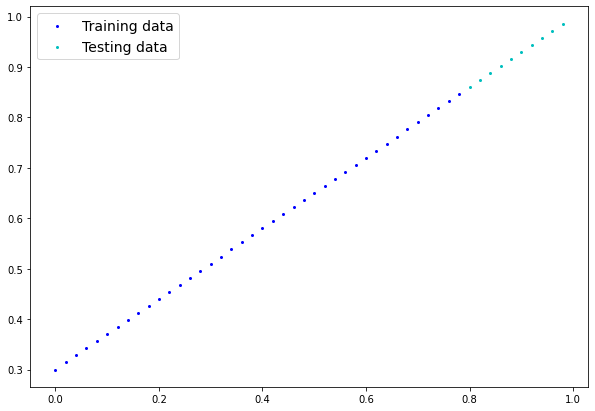

In [5]:
def visualize(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
    
    """ Plots training data, test data and compares predictions """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in cyan
    plt.scatter(test_data, test_labels, c="c", s=4, label="Testing data")

    # Plot the predictions in red if they exist
    if predictions is not None: 
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
    # Show the legend
    plt.legend(prop={"size": 14});

visualize();

# Model building

In [6]:
from torch import nn

class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        # we start with a random weight parameters, they are updated via gradient descent
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) 
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) 
    
    # Forward methoddefines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias 

# Parameter exploration

In [7]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model = LinearRegressionModel()

# List named parameters
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Prediction with untrained model


    target y:
    tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

    predicted y:
    tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])



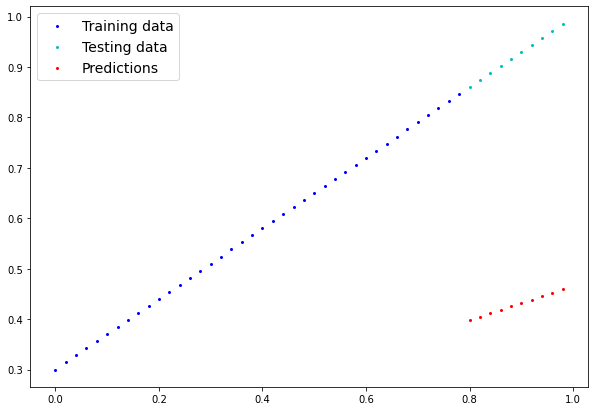

In [8]:
# we don't keep track of gradients during prediction
with torch.inference_mode(): y_preds = model(X_test)
visualize(predictions=y_preds)

print(
f'''
    target y:
    {y_preds}

    predicted y:
    {y_test}
'''
)


# Training the model

In [9]:
# loss function - mean absolute error (L1 loss)
loss_fn = nn.L1Loss()

# Stochastic gradient descent with learning rate 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) 

# model progress tracking
epochs = 200
epoch_count = [] 
loss_values = []
test_loss_values = [] 

# Training & testing loop
for epoch in range(epochs + 1): 

    # Training Mode (sets all parameters to require grad)
    model.train() 

    # 1. Forward pass (feeds training data to forward())
    y_pred = model(X_train)

    # 2. Calculate the loss (how wrong is the model)
    loss = loss_fn(y_pred, y_train)

    # 3. Clears the gradients (they accumulate by default)
    optimizer.zero_grad() 

    # 4. Back-propagation (calculates grad of each parameter)
    loss.backward()

    # 5. Gradient-descent (updates model parameters)
    optimizer.step() 

    # Evaluation Mode (turns off certain functionalities)
    model.eval() 

    with torch.inference_mode():
        # 1. Do the forward pass 
        test_pred = model(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Display information output
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}  |  Loss: {loss}  |  Test loss: {test_loss}")
        print(f"{model.state_dict()}\n") 

Epoch: 0  |  Loss: 0.31288138031959534  |  Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 10  |  Loss: 0.1976713240146637  |  Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch: 20  |  Loss: 0.08908725529909134  |  Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch: 30  |  Loss: 0.053148526698350906  |  Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch: 40  |  Loss: 0.04543796554207802  |  Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])

Epoch: 50  |  Loss: 0.04167863354086876  |  Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])

Epoch: 60  |  Loss: 0.03818932920694351  |  Test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116]

# Predictions with trained model


    target weight: 0.7
    predicted weight: 0.6951308250427246
    
    target bias: 0.3
    predicted bias: 0.29931047558784485



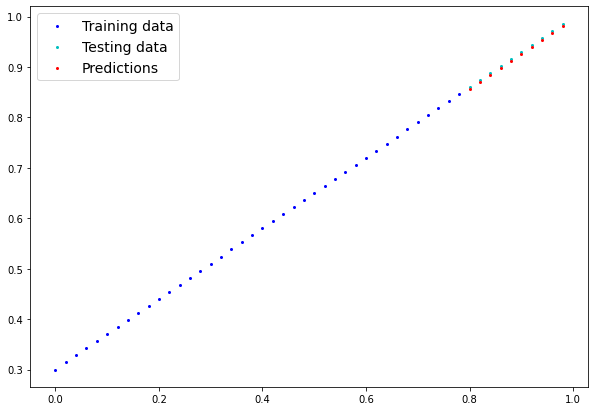

In [10]:
with torch.inference_mode(): y_preds = model(X_test)

visualize(predictions=y_preds)

print(
f'''
    target weight: {weight}
    predicted weight: {model.state_dict()["weight"].item()}
    
    target bias: {bias}
    predicted bias: {model.state_dict()["bias"].item()}
'''
)


# Loss curves

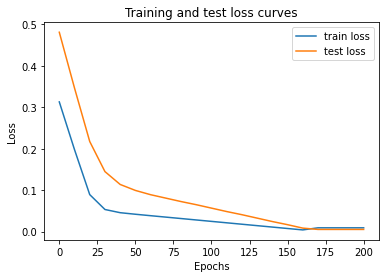

In [11]:
# Turn tensor into numpy array
np_loss_values = torch.tensor(loss_values).numpy()

# Plot the loss curves
plt.plot(epoch_count, np_loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving the model

In [12]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [13]:
# Check if model is present
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Nov  6 21:29 01_pytorch_workflow_model_1.pth


# Loading the Model

In [14]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModel()

# Load the saved state_dict of model (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode(): loaded_model_preds = loaded_model(X_test)

# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])